In [ ]:
from andi_datasets.datasets_theory import datasets_theory
from andi_datasets.utils_trajectories import normalize
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
AD = datasets_theory()

In [ ]:
trajs = AD.create_dataset(exponents = 1, models=np.arange(5), N_models = 1, T = 500, dimension=2)[:,2:]
# trajs = trajs.reshape(5, 500, 2)

In [ ]:
trajs.shape

(5, 1000)

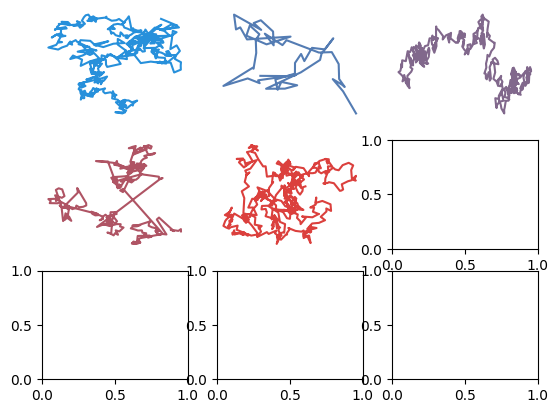

In [ ]:
import matplotlib.colors as clr
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)
colors = cmap(np.linspace(0,1, trajs.shape[0]))

fig, axs = plt.subplots(3,3)
for t, c, ax in zip(trajs, colors, axs.flatten()):

    ax.plot(normalize(t[:500]), normalize(t[500:]), c = c)
    ax.set_axis_off()
fig.savefig('theory_models.svg')

In [ ]:
trajs = AD.create_dataset(exponents = 0.2, models=1, N_models = 10000, T = 500)[:,2:]

In [ ]:
msd = (trajs**2).mean(axis = 0)

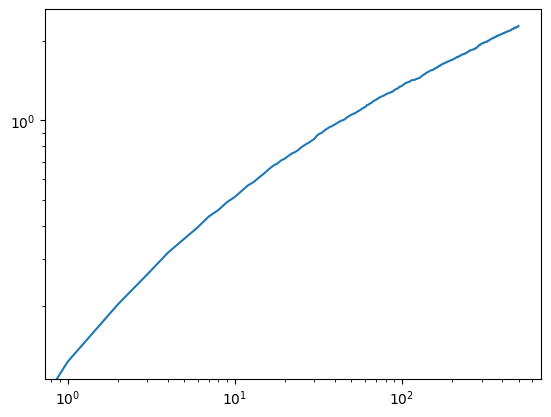

In [ ]:
plt.loglog(msd)
plt.savefig('msd.svg')

In [ ]:
#| hide
from andi_datasets.models_phenom import models_phenom
from andi_datasets.utils_trajectories import inside_fov_dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as clr


In [ ]:
L = 200; T = 100
Ns = [20,10,10]
alphas = [1,1.5]
D = 1   

trajs, labels = models_phenom().multi_state(N = 300, L = L, T = T)

In [ ]:
fov_length = 45
fovs_origin = [[10,10], [50, 60], [150, 50], [100,100], [140, 150], [40, 130]] 

TF, LF = [], []
for fov_origin in fovs_origin:
    trajs_fov, labels_fov = inside_fov_dataset(trajs, labels, fov_origin, fov_length)

    TF.append(trajs_fov)
    LF.append(labels_fov)

# fov_origin2 = [105,90]; fov_length = L*0.4
# trajs_fov2, labels_fov = inside_fov_dataset(trajs, labels, fov_origin2, fov_length)

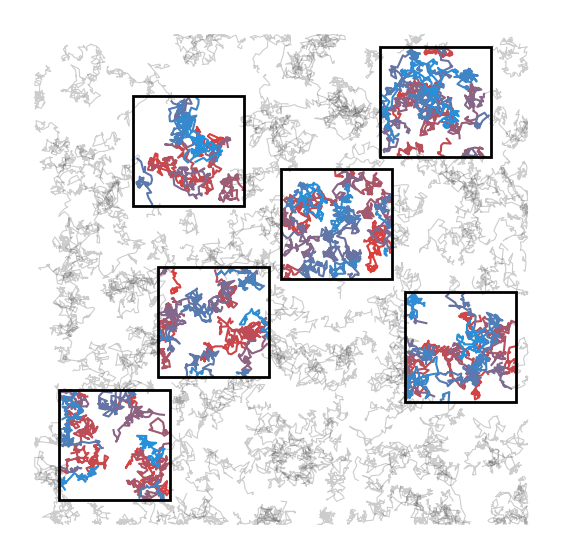

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)

for idx, og_traj in enumerate(trajs[:, :, :].transpose(1,0,2)):
    ax.plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.2, lw = 0.8)

for trajs_fov, fov_origin in zip(TF, fovs_origin):
    colors = cmap(np.linspace(0, 1, len(trajs_fov)))
    for t, c in zip(trajs_fov, colors[::-1, :]):
        ax.plot(t[0], t[1], c= c)   

    fov_min_x, fov_min_y = fov_origin
    fov_max_x, fov_max_y = np.array(fov_origin)+fov_length
    # currentAxis = ax.gca()
    ax.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 20))
    # break


# ax.add_patch(Rectangle((0, 0), L, L, fill=None, alpha=1, lw = 3, label = 'FOV', zorder = 20, edgecolor = '#e06c2b'))

# colors2 = cmap(np.linspace(0, 1, len(trajs_fov2)))
# for t, c in zip(trajs_fov2, colors2[::-1, :]):
#     ax.plot(t[0], t[1], c= c)

# FOV
# fov_min_x, fov_min_y = fov_origin
# fov_max_x, fov_max_y = np.array(fov_origin)+fov_length
# # currentAxis = ax.gca()
# ax.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 20))

# fov_min_x, fov_min_y = fov_origin2
# fov_max_x, fov_max_y = np.array(fov_origin2)+fov_length
# # currentAxis = ax.gca()
# ax.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 20))


# Boundary
# ax.axhline(0,  alpha = 0.5, ls = '--', c = 'k', label = 'boundary')
# ax.axhline(L,  alpha = 0.5, ls = '--', c = 'k')
# ax.axvline(0,  alpha = 0.5, ls = '--', c = 'k')
# ax.axvline(L,  alpha = 0.5, ls = '--', c = 'k')


ax.set_axis_off()
# FOV origin
# ax.scatter(fov_origin[0], fov_origin[1], label = 'FOV origin', s = 40, zorder = 10)

# # legend = ax.legend()
# legend.get_frame().set_alpha(None)
# plt.setp(ax, xlabel = 'X (px)', ylabel = 'Y (px)')
# plt.setp(ax2, xlim = (0,L), ylim = (0,L));
plt.savefig('fov.svg', transparent = True,bbox_inches = 0)

# Twitter communication

In [ ]:
from andi_datasets.utils_videos import transform_to_video, play_video

In [ ]:
import numpy as np

In [ ]:
T = 100 # number of time steps (frames)
L = 32
# pos = np.zeros((10, T, 2))
pos = 0.1*np.random.randn(1, T, 2).cumsum(1)+L/2

In [ ]:
video = transform_to_video(
    pos.transpose(1,0,2),
    optics_props={"output_region": [0, 0, L, L]},
    particle_props = {"particle_intensity": [500,  0,]},
    background_props = {"background_mean": 10}
)

In [ ]:
play_video(video)

In [ ]:
import imageio
from andi_datasets.utils_videos import convert_uint8
imageio.mimwrite('test.gif', convert_uint8(video))

# AnDi2 seminar

In [ ]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
import deeptrack as dt
from andi_datasets.models_phenom import models_phenom

In [ ]:
T = 500 # number of time steps (frames)
N = 1 # number of particles (trajectories)
L = 30#1.5 * 128 # length of the box (pixels) -> extending fov by 1.5 times
D = 0.1 # diffusion coefficient (pixels^2/frame)

In [ ]:
trajs, labels = models_phenom().multi_state(
    N=N,
    L=L,
    T=T,
    alphas=[1.2, 0.7],
    Ds=[10 * D, 0.1 * D]
)

In [ ]:
trajs.shape

(500, 1, 2)

In [ ]:
vip_particles = np.arange(10).tolist()#[12., 15., 16., 19., 20., 25., 27., 32., 36., 38., 42., 43., 45.]
video, masks = transform_to_video(
    trajs,
    optics_props= {
        "output_region": [0, 0, L+2, L+1]
    },
    get_vip_particles=vip_particles,
    with_masks=True
)

In [ ]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
viridis = mpl.colormaps['Blues'].resampled(256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([1, 1, 1, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

In [ ]:
trajs, _ = models_phenom().single_state(
    N=4,
    L=L,
    T=100,
    alphas=[1.2, 0],
    Ds=[D, 0]
)

video = transform_to_video(
    trajs,
    optics_props= {
        "output_region": [0, 0, L+2, L+1]
    },
    with_masks=False
)

In [ ]:
play_video(video)

In [ ]:
import imageio
from andi_datasets.utils_videos import convert_uint8
imageio.mimwrite('video2_andi2seminar.gif', convert_uint8(video))

[-0.5, 31.0, -0.5, 31.0]

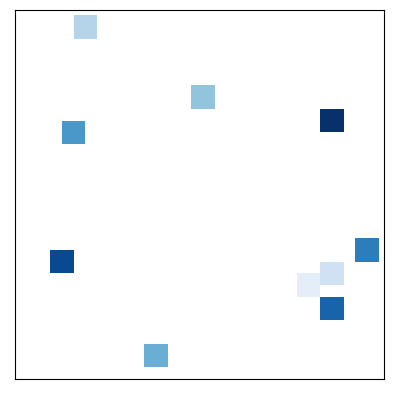

In [ ]:
vip_m = masks[0].copy()
fig, ax1 = plt.subplots()
ax1.imshow(vip_m, cmap = newcmp)
#ax1.set_title("VIP particle masks")
plt.setp(ax1, xlim = (-0.5, L+1), ylim = (-0.5, L+1), xticks = [], yticks = [])


[Text(0.5, 0, 'X (px)'), Text(0, 0.5, 'Y (px)'), -0.5, 61.0, -0.5, 61.0]

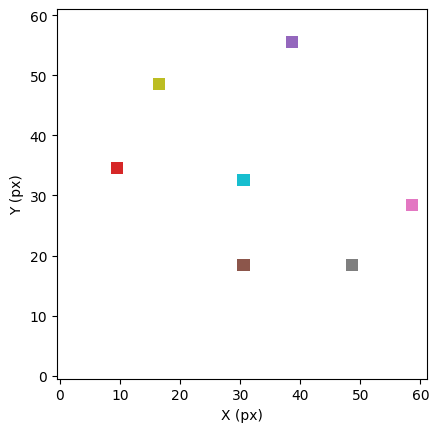

In [ ]:
vip_m = masks[0].copy()
fig, ax1 = plt.subplots()
ax1.imshow(vip_m, cmap = newcmp)
#ax1.set_title("VIP particle masks")
plt.setp(ax1, xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (-0.5, 61), ylim = (-0.5, 61))


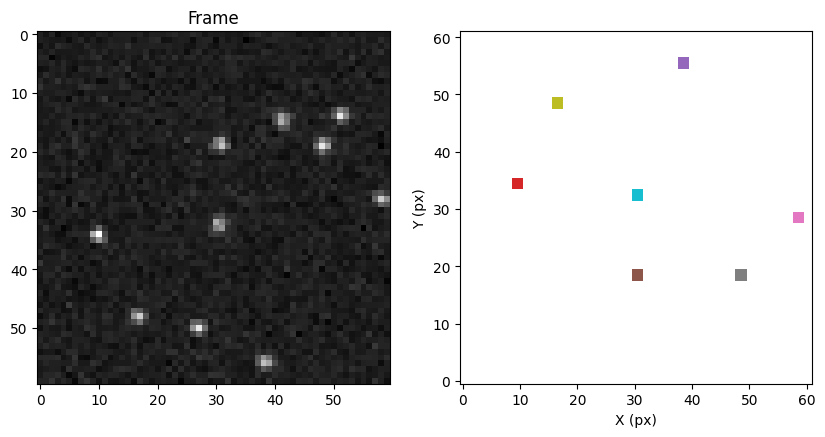

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(video[0], cmap="gray")
ax0.set_title("Frame")
ax1.imshow(vip_m, cmap = newcmp)
#ax1.set_title("VIP particle masks")
plt.setp(ax1, xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (-0.5, 61), ylim = (-0.5, 61))
plt.show()

## Presentation

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

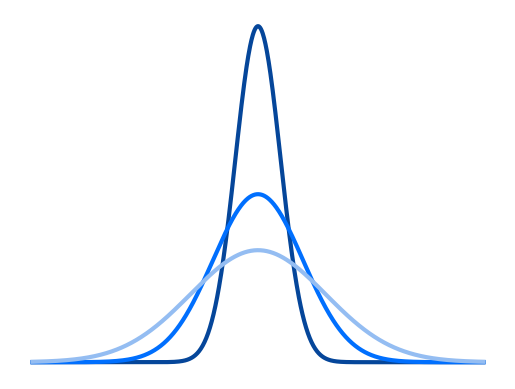

In [ ]:
rv = norm(loc = 0, scale = 1)
x = np.linspace(-10, 10, 1000)
fig, ax1 = plt.subplots()

scales = [1, 2, 3]
colors = ['#05469aff', '#006ffeff', '#94bdf2ff']
for scale, color in zip(scales, colors):   

    ax1.plot(x, norm(loc = 0, scale = scale).pdf(x), c = color, lw=3)


ax1.set_axis_off()

# ax1.set_frame_on(False)
# ax1.get_xaxis().tick_bottom()
# ax1.axes.get_yaxis().set_visible(False)
# xmin, xmax = ax1.get_xaxis().get_view_interval()
# ymin, ymax = ax1.get_yaxis().get_view_interval()
# ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))

# plt.setp(ax1, xticks = [-10, -5, 0, 5, 10], yticks = []);
# ax.set_xlabel

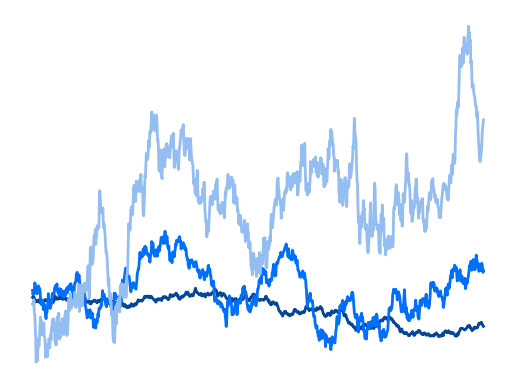

In [ ]:
fig, ax1 = plt.subplots()

for scale, color in zip(scales, colors):   

    ax1.plot(np.cumsum(np.random.randn(1000)*scale**2), c = color, lw = 2)
ax1.set_axis_off()

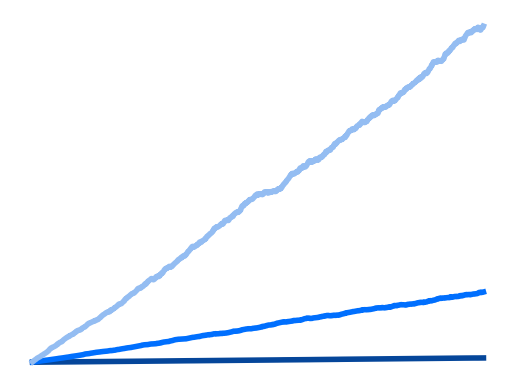

In [ ]:
fig, ax1 = plt.subplots()

for scale, color in zip(scales, colors):   
    trajs = np.cumsum(np.random.randn(1000, 1000)*scale**2, axis = 1)
    msd = (trajs**2).mean(0)
    ax1.plot(msd, c = color, lw = 4)
ax1.set_axis_off()

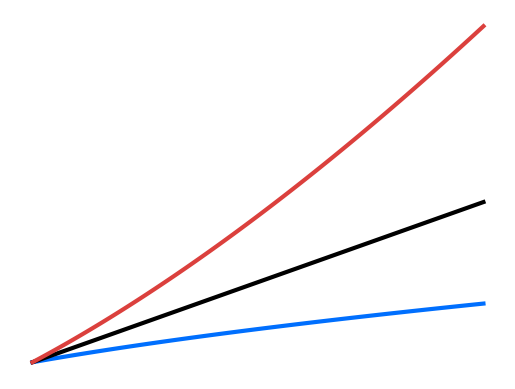

In [ ]:
x = np.linspace(1, 3, 100)

colors = ['#006ffeff', '#000000ff', '#db403dff']
fig, ax = plt.subplots()
for exp, color in zip([0.5, 1, 1.5], colors):
    ax.plot(x, x**exp, c = color, lw = 3)
ax.set_axis_off()

In [ ]:
from andi_datasets.utils_challenge import multimode_dist

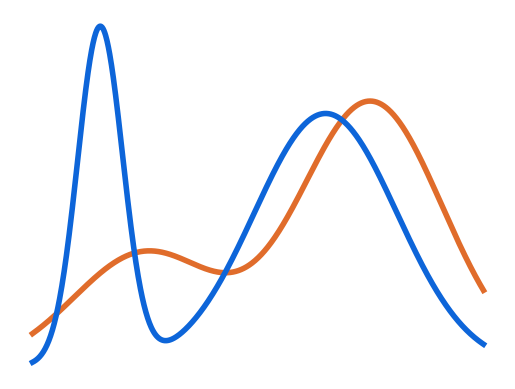

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 2, 1000)

dist = multimode_dist(params = [[0.5, 0.1], [1.5, 0.1]], weights=[0.3, 0.7], x = x, bound = [0,2])
ax.plot(x, dist, c = '#e06c2b', lw = 4)

dist = multimode_dist(params = [[0.3, 0.01], [1.3, 0.1]], weights=[0.3, 0.7], x = x, bound = [0,2])
ax.plot(x, dist, c = '#0d65d9', lw = 4)

ax.set_axis_off()

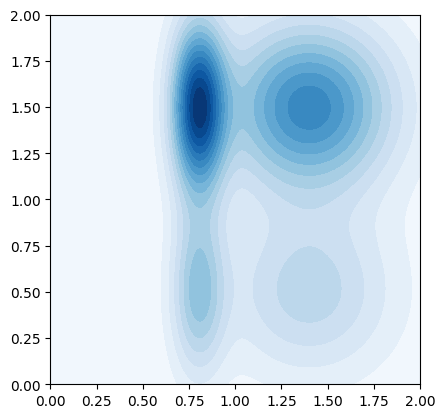

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Example distributions P and Q over a range x
x = np.linspace(0, 2, 1000)  # Define the range
P = multimode_dist(params = [[0.5, 0.1], [1.5, 0.1]], weights=[0.3, 0.7], x = x, bound = [0,2])
Q = multimode_dist(params = [[0.8, 0.01], [1.4, 0.1]], weights=[0.3, 0.7], x = x, bound = [0,2])

# Creating a meshgrid for the joint distribution
X, Y = np.meshgrid(x, x)

# Assuming independence, computing the joint distribution
J = np.outer(P, Q)

# Plotting the joint distribution as a contour plot
# ax.contour(X, Y, J, colors= 'k', lw = 0.1)
ax.contourf(X, Y, J, levels = 20, cmap = 'Blues')
ax.set_aspect('equal')
